From http://giusedroid.blogspot.com/2015/04/blog-post.htmld
Quickie: Mix up OpenCV and Jupyter (iPython Notebook)

The purpose of this post is to show how to plot images acquired with opencv rather than matplotlib. Just in case. 
First of all, set matplotlib inline and import the necessary stuff.

In [ ]:
! wget --no-check-certificate http://www.hobieco.com/linked_images/H18-Magnum.jpg

In [ ]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print "OpenCV Version : %s " % cv2.__version__

In [ ]:
image = cv2.imread("H18-Magnum.jpg")
fig, ax = plt.subplots()
fig.set_size_inches(3, 3)
ax.axis([35, 150, 250, 100])
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

The image has been correctly loaded by openCV as a numpy array, but the color of each pixel has been sorted as BGR. Matplotlib's plot expects an RGB image so, for a correct display of the image, it is necessary to swap those channels. This operation can be done either by using openCV conversion functions cv2.cvtColor() or by working directly with the numpy array.
cvtColor
cvtColor is the openCV function which changes the color space of an image. It takes as input an image and a numerical flag which represents the conversion function. Let's list some of that.

In [ ]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('H18-Magnum.jpg', 'r')
imshow(np.asarray(pil_im))

In [ ]:
from IPython.display import Image 
Image(filename='H18-Magnum.jpg')

In [ ]:
BGRflags = [flag for flag in dir(cv2) if flag.startswith('COLOR_BGR') ]
print BGRflags

In this case it's necessary to change the image space from BGR (Blue, Green, Red) to RGB, so the correct flag is cv2.COLOR_BGR2RGB

In [ ]:
t0 = t.time()
cv_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
t1 = t.time()
dt_cv = t1-t0
print "Conversion took %0.5f seconds" % dt_cv

In [ ]:
plt.imshow(cv_rgb)
plt.show()

below from from http://matplotlib.org/users/text_intro.html

In [ ]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, u'unicode: Institut f\374r Festk\366rperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10])

plt.show()

# Added Friday afternoon 17 Mar 17

In [ ]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import matplotlib.cm as cm
image = cv2.imread("Screenshot_2016-02-23-12-47-43.png")
fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
#ax.axis([1280, 1400, 400, 200])
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

In [ ]:
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(2, 2))
up_right_gray_target = image_gray[210:310, 1280:1400]
plt.imshow(up_right_gray_target, cmap = cm.gray)
plt.show()

In [ ]:
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(2, 2))
low_left_gray_target = image_gray[2412:2512,65:165]
plt.imshow(low_left_gray_target, cmap = cm.gray)
plt.show()

In [ ]:
image_gray = cv2.imread("Screenshot_2016-02-23-12-47-43.png",0)
#targets = [up_right_gray_target,low_left_gray_target]
targets = [up_right_gray_target]
for tgt in targets:
    w, h = tgt.shape[::-1]
    res = cv2.matchTemplate(image_gray,tgt,cv2.TM_CCOEFF)
    res1= cv2.matchTemplate(image_gray,tgt,cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(image_gray,top_left, bottom_right, 255, 2)
#fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 14))
#plt.imshow(image_gray, cmap = cm.gray)
#plt.show()

In [ ]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.imshow(res,cmap=cm.gray)
plt.subplot(1,2,2)
plt.imshow(res1,cmap=cm.gray)
plt.show()

# Added Thursday afternoon 23 Mar 17 

In [ ]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import matplotlib.cm as cm
image_gray = cv2.imread("Screenshot_2016-02-23-12-47-43.png",0)
up_right_gray_target = image_gray[210:310, 1280:1400]
#targets = [up_right_gray_target,low_left_gray_target]
targets = [up_right_gray_target]
for tgt in targets:
    w, h = tgt.shape[::-1]
    res_TM_CCOEFF = cv2.matchTemplate(image_gray,tgt,cv2.TM_CCOEFF)
    res_TM_CCOEFF_NORMED = cv2.matchTemplate(image_gray,tgt,cv2.TM_CCOEFF_NORMED)
    res_TM_SQDIFF = cv2.matchTemplate(image_gray,tgt,cv2.TM_SQDIFF)
    res_TM_SQDIFF_NORMED = cv2.matchTemplate(image_gray,tgt,cv2.TM_SQDIFF_NORMED)
    res_TM_CORR = cv2.matchTemplate(image_gray,tgt,cv2.TM_CCORR)
    res_TM_CORR_NORMED = cv2.matchTemplate(image_gray,tgt,cv2.TM_CCORR_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res_TM_SQDIFF_NORMED)
#    top_left = max_loc
    top_left = min_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(image_gray,top_left, bottom_right, 255, 2)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 14))
plt.imshow(image_gray, cmap = cm.gray)
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,29))
ax1 = fig.add_subplot(321)
plt.title('CCOEFF')
plt.imshow(res_TM_CCOEFF,cmap=cm.gray)
plt.subplot(3,2,2)
plt.title('CCOEFF_NORMED')
plt.imshow(res_TM_CCOEFF_NORMED,cmap=cm.gray)
plt.subplot(3,2,3)
plt.title('TM_SQDIFF')
plt.imshow(res_TM_SQDIFF,cmap=cm.gray)
plt.subplot(3,2,4)
plt.title('TM_SQDIFF_NORMED')
plt.imshow(res_TM_SQDIFF_NORMED,cmap=cm.gray)
plt.subplot(3,2,5)
plt.title('TM_CORR')
plt.imshow(res_TM_CORR,cmap=cm.gray)
plt.subplot(3,2,6)
plt.title('TM_CORR_NORMED')
plt.imshow(res_TM_CORR_NORMED,cmap=cm.gray)
plt.show()

# Added Friday afternoon 15 Apr 17

In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.dates import date2num, MonthLocator, WeekdayLocator, DateFormatter
import datetime as dt
import numpy as np
import pandas as pd

In [2]:
count = (dt.datetime.today() - dt.datetime(2016,11,15)).days
count

150

In [3]:
dates = [dt.datetime(2016,11,15) + dt.timedelta(days=i) for i in xrange(count)]
type(dates)

list

In [4]:
type1 = np.random.randint(0,5,count)
type2 = np.random.randint(0,5,count)

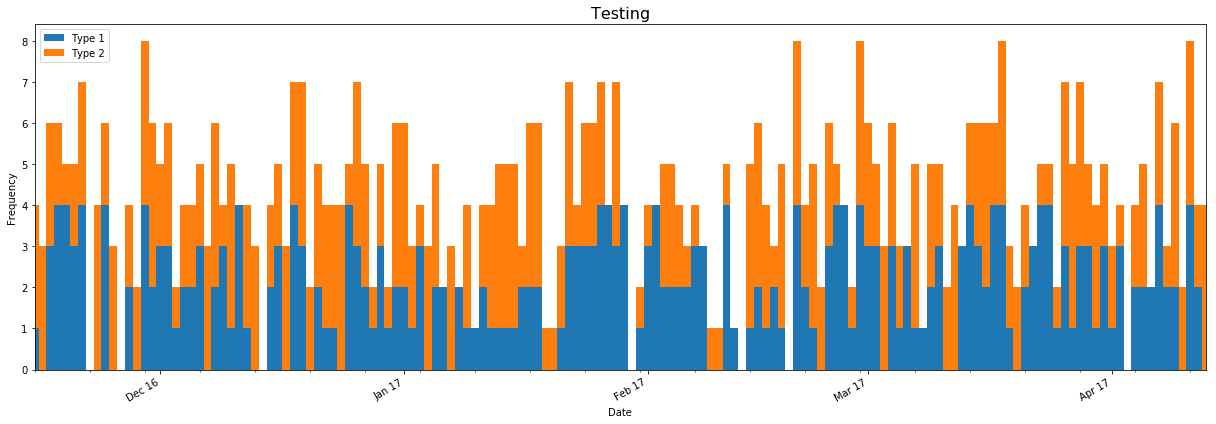

In [9]:
#plt.figure(figsize=(20,7))
#plt.title('Testing', fontsize=16)
#plt.xlabel('Date', fontsize=16)
#plt.ylabel('Frequency', fontsize=16)
fig, ax = plt.subplots(1,1)
ax.bar(date2num(dates), type1, width=1, label='Type 1')
ax.bar(date2num(dates), type2, bottom = type1, width=1, label='Type 2')
ax.xaxis_date()
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_minor_locator(WeekdayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
ax.set_title('Testing', fontsize=16)
ax.set_xlabel('Date')
ax.set_ylabel('Frequency')
ax.set_xlim(date2num(dates[0]),date2num(dates[-1]))
fig.set_size_inches(17,6)
fig.autofmt_xdate()
fig.tight_layout()
ax.legend()
plt.show()